1. Exploratory Data Analysis (EDA)
Avant d'entraîner un modèle, il faut comprendre les données.

a. Chargement et prétraitement des données

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('/Users/booba/Downloads/census+income/adult.data')

In [3]:
print(df.head(5))

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [4]:
print(df.shape)

(32560, 15)


In [5]:
print(df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [8]:


# Renommer les colonnes avec des noms plus compréhensibles
df.columns = [
    'Age', 'Employment_Type', 'Final_Weight', 'Education', 'Years_Education',
    'Marital_Status', 'Occupation', 'Family_Relationship', 'Race', 'Gender',
    'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Country', 'Income'
]

In [11]:

# Afficher les premières lignes pour vérifier
print(df.head())

   Age    Employment_Type  Final_Weight   Education  Years_Education  \
0   50   Self-emp-not-inc         83311   Bachelors               13   
1   38            Private        215646     HS-grad                9   
2   53            Private        234721        11th                7   
3   28            Private        338409   Bachelors               13   
4   37            Private        284582     Masters               14   

        Marital_Status          Occupation Family_Relationship    Race  \
0   Married-civ-spouse     Exec-managerial             Husband   White   
1             Divorced   Handlers-cleaners       Not-in-family   White   
2   Married-civ-spouse   Handlers-cleaners             Husband   Black   
3   Married-civ-spouse      Prof-specialty                Wife   Black   
4   Married-civ-spouse     Exec-managerial                Wife   White   

    Gender  Capital_Gain  Capital_Loss  Hours_Per_Week         Country  Income  
0     Male             0             0   

In [6]:
print(df.isnull().sum())

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [12]:
# Vérifier les types de données
print(df.dtypes)

Age                     int64
Employment_Type        object
Final_Weight            int64
Education              object
Years_Education         int64
Marital_Status         object
Occupation             object
Family_Relationship    object
Race                   object
Gender                 object
Capital_Gain            int64
Capital_Loss            int64
Hours_Per_Week          int64
Country                object
Income                 object
dtype: object


b. Visualisation des distributions

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Convertir la variable cible en binaire (1 = ">50K", 0 = "<=50K")
df['Income'] = df['Income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


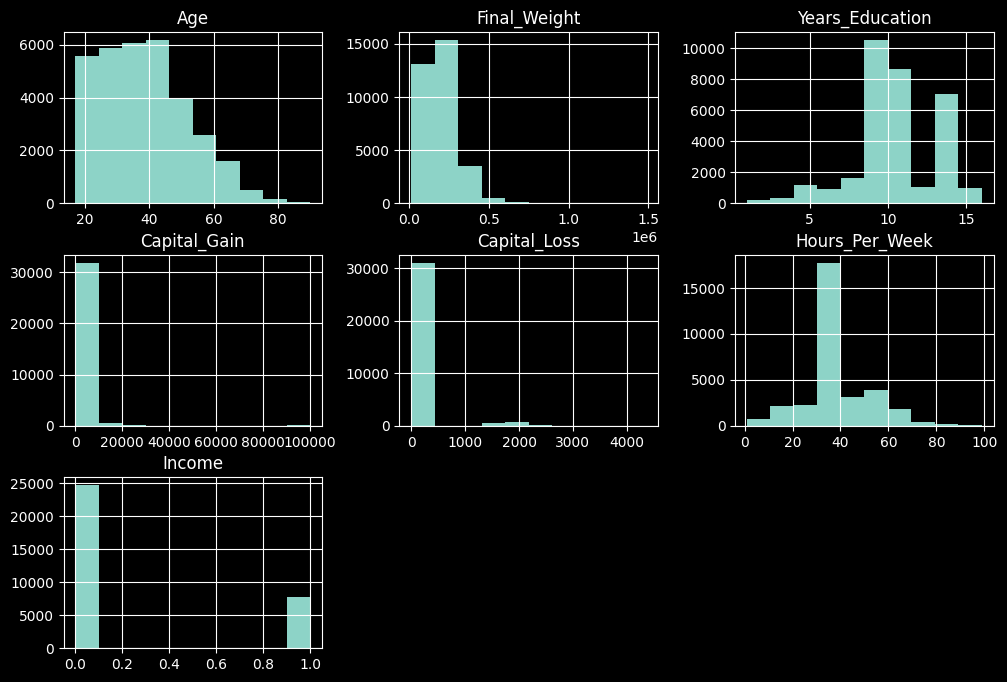

In [14]:
# Histogrammes des variables numériques
df.hist(figsize=(12,8))
plt.show()

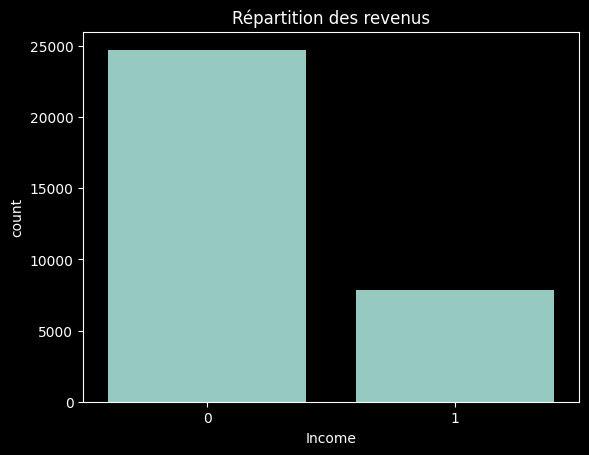

In [15]:
# Distribution de la variable cible
sns.countplot(x='Income', data=df)
plt.title("Répartition des revenus")
plt.show()

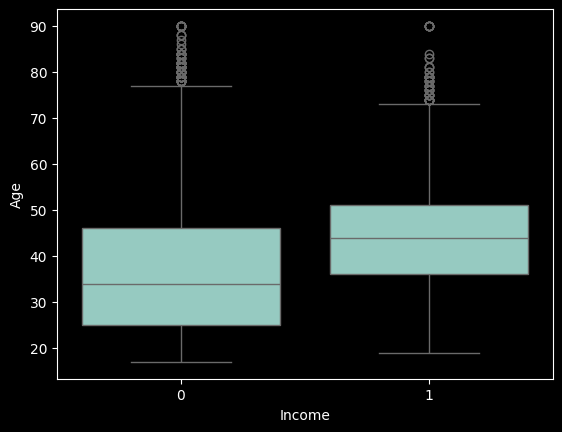

In [16]:
# Boxplot de l'âge en fonction du revenu
sns.boxplot(x='Income', y='Age', data=df)
plt.show()

c. Encodage des variables catégoriques

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégoriques
for col in ['Employment_Type', 'Education', 'Marital_Status', 'Occupation', 'Family_Relationship', 'Race', 'Gender', 'Country']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())


   Age  Employment_Type  Final_Weight  Education  Years_Education  \
0   50                6         83311          9               13   
1   38                4        215646         11                9   
2   53                4        234721          1                7   
3   28                4        338409          9               13   
4   37                4        284582         12               14   

   Marital_Status  Occupation  Family_Relationship  Race  Gender  \
0               2           4                    0     4       1   
1               0           6                    1     4       1   
2               2           6                    0     2       1   
3               2          10                    5     2       0   
4               2           4                    5     4       0   

   Capital_Gain  Capital_Loss  Hours_Per_Week  Country  Income  
0             0             0              13       39       0  
1             0             0              40 

2. Split des données (Train, Validation, Test)

In [18]:
from sklearn.model_selection import train_test_split

# Séparer les features et la cible
X = df.drop(columns=['Income'])
y = df['Income']

# Split des données en 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (22792, 14), Validation: (4884, 14), Test: (4884, 14)


a. Régression Logistique

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entraînement
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Prédiction sur validation
y_pred_val = lr_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Régression Logistique: {accuracy:.4f}")


Accuracy Régression Logistique: 0.8053


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


b. Arbre de Décision

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédiction
y_pred_val = dt_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Arbre de Décision: {accuracy:.4f}")


Accuracy Arbre de Décision: 0.8055


c. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_val = rf_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Random Forest: {accuracy:.4f}")


Accuracy Random Forest: 0.8628


a. Régression Logistique

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_lr.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Logistic Regression: {grid_lr.best_params_}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Meilleur hyperparamètre pour Logistic Regression: {'C': 0.1}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


b. Arbre de Décision

In [23]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_dt.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Decision Tree: {grid_dt.best_params_}")


Meilleur hyperparamètre pour Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


c. Random Forest

In [24]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Random Forest: {grid_rf.best_params_}")


Meilleur hyperparamètre pour Random Forest: {'max_depth': 20, 'n_estimators': 200}


5. Évaluation finale après tuning

In [25]:
# Réentraîner avec les meilleurs paramètres
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

# Prédiction sur le set test
models = {'Régression Logistique': best_lr, 'Arbre de Décision': best_dt, 'Random Forest': best_rf}

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy finale {name}: {accuracy:.4f}")


Accuracy finale Régression Logistique: 0.7967
Accuracy finale Arbre de Décision: 0.8493
Accuracy finale Random Forest: 0.8626


6. Matrice de Confusion, ROC Curve et AUC
Matrice de Confusion pour chaque modèle

<Figure size 600x400 with 0 Axes>

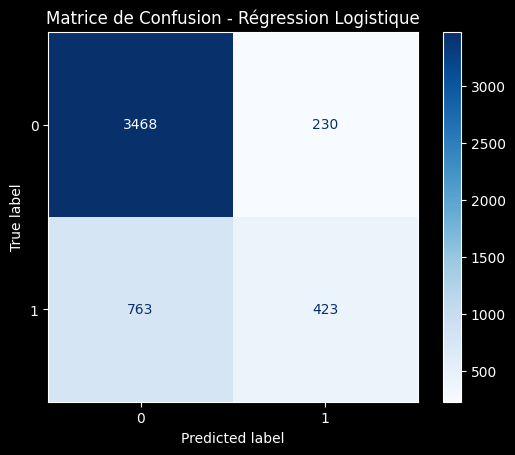

<Figure size 600x400 with 0 Axes>

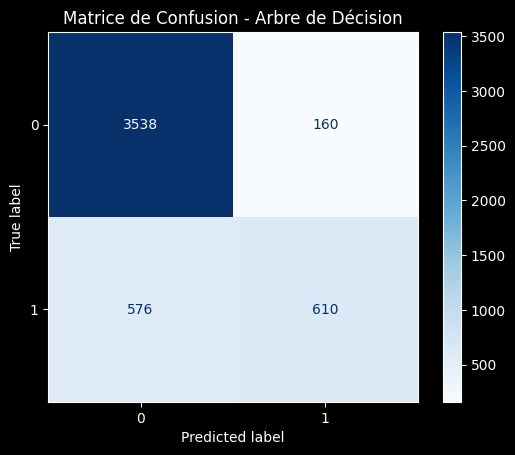

<Figure size 600x400 with 0 Axes>

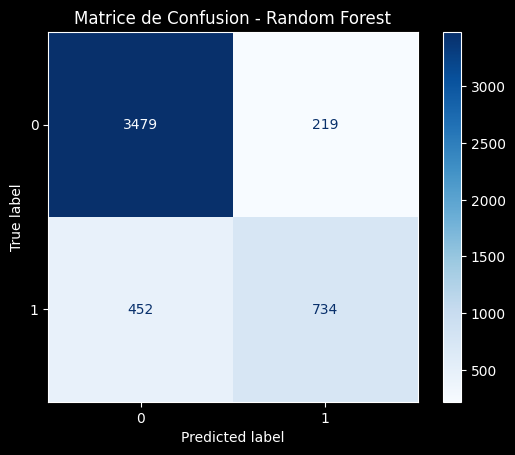

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Générer et afficher la matrice de confusion pour chaque modèle
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matrice de Confusion - {name}")
    plt.show()



ROC Curve et AUC

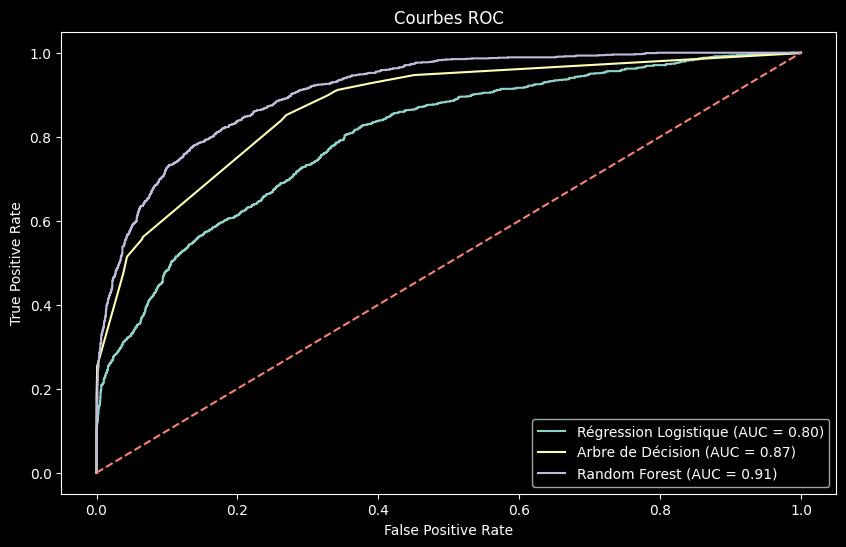

In [27]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilité de classe positive
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC")
plt.legend()
plt.show()
